<a href="https://colab.research.google.com/github/Rarag1/trainings/blob/main/Python/HWA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

### 1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

In [ ]:
df.describe()

### 1.2 Изучите стоимости недвижимости

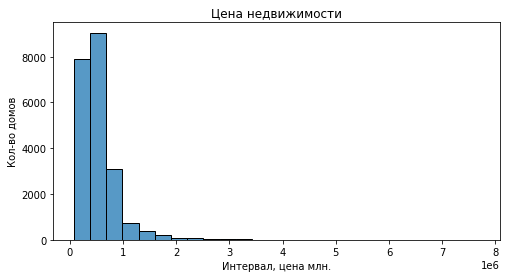

In [4]:
plt.figure(figsize=(8, 4))

sns.histplot(df['price'], bins=25)

plt.title('Цена недвижимости')
plt.xlabel('Интервал, цена млн.')
plt.ylabel('Кол-во домов');

### 1.3 Изучите распределение квадратуры жилой

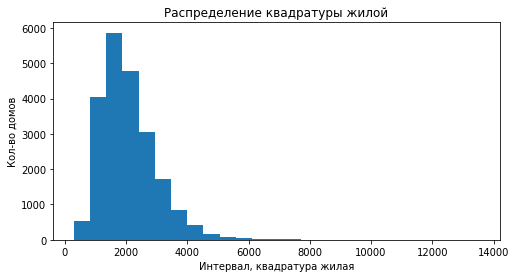

In [5]:
plt.figure(figsize=(8, 4))

plt.hist(df['sqft_living'], bins=25)

plt.title('Распределение квадратуры жилой')
plt.xlabel('Интервал, квадратура жилая')
plt.ylabel('Кол-во домов');

### 1.4 Изучите распределение года постройки

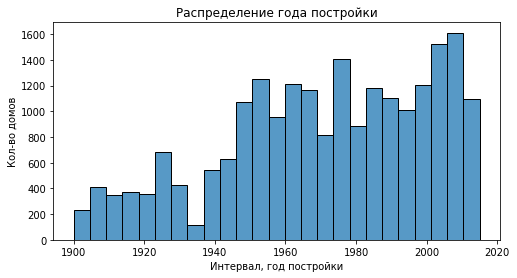

In [6]:
plt.figure(figsize=(8, 4))

sns.histplot(df['yr_built'], bins=25)

plt.title('Распределение года постройки')
plt.xlabel('Интервал, год постройки')
plt.ylabel('Кол-во домов');

## 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы


In [7]:
data1 = df['waterfront'].value_counts()
data1.index = ['no', 'yes']
data1

no     21450
yes      163
Name: waterfront, dtype: int64

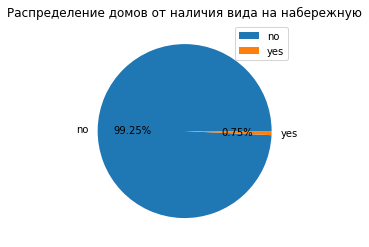

In [8]:

plt.figure(figsize=(10, 4))

plt.pie(data1, autopct='%1.2f%%', labels=data1.index)

plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data1.index);

### 2.2 Изучите распределение этажей домов


In [9]:
data2 = df['floors'].value_counts().reset_index()
data2

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


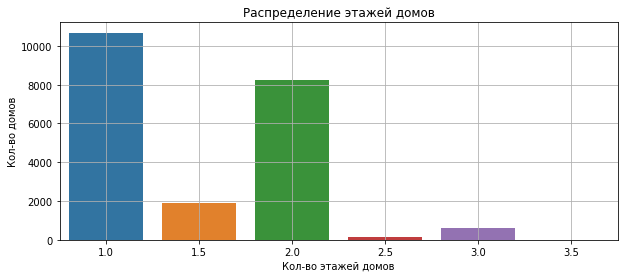

In [10]:
plt.figure(figsize=(10, 4))

sns.barplot(x=data2['index'], y=data2['floors'])

plt.title('Распределение этажей домов')
plt.xlabel('Кол-во этажей домов')
plt.ylabel('Кол-во домов')
plt.grid();

### 2.3 Изучите распределение состояния домов

In [11]:
data3 = df['grade'].value_counts().reset_index().sort_values(['index'])
data3

,index,grade
11,1,1
10,3,3
8,4,29
6,5,242
3,6,2038
0,7,8981
1,8,6068
2,9,2615
4,10,1134
5,11,399


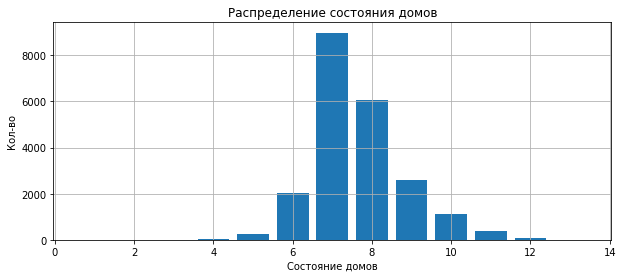

In [12]:
plt.figure(figsize=(10, 4))

plt.bar(data3['index'], data3['grade'])

plt.title('Распределение состояния домов')
plt.xlabel('Состояние домов')
plt.ylabel('Кол-во')
plt.grid();

In [13]:
data31 = df['grade'].value_counts()
data31

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

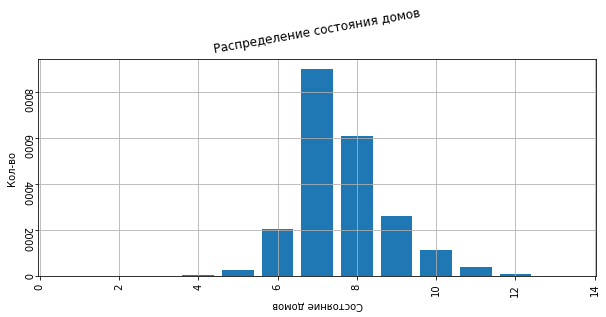

In [14]:
plt.figure(figsize=(10, 4))

plt.bar(data31.index, data31.values)

plt.title('Распределение состояния домов', rotation=370)
plt.xlabel('Состояние домов', rotation=180)
plt.ylabel('Кол-во')
plt.xticks(rotation=450)
plt.yticks(rotation=270)
plt.grid();

### 3 задача
* Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [24]:
import numpy as np
corma=np.round(df.corr(),1)
corma[np.abs(corma)<0.3]=0
corma

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


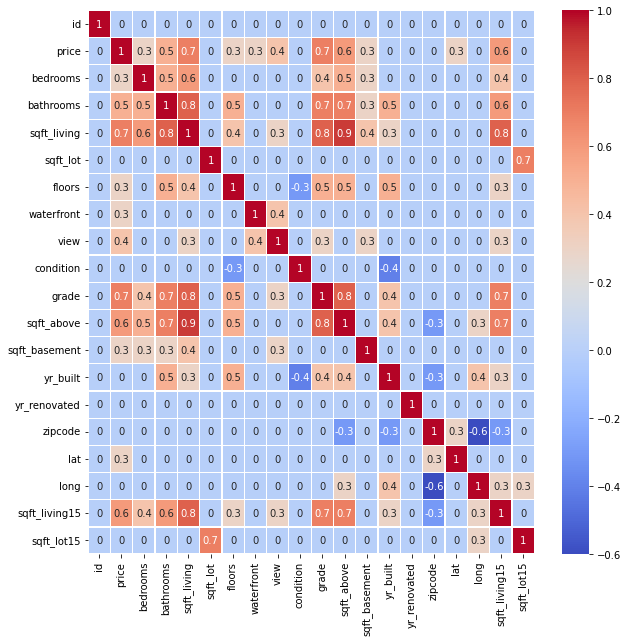

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(corma, annot=True,linewidths=.3, cmap='coolwarm')

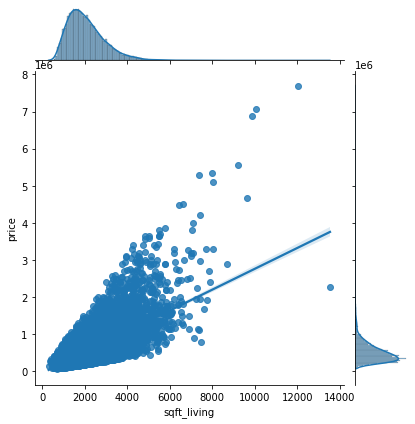

In [31]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

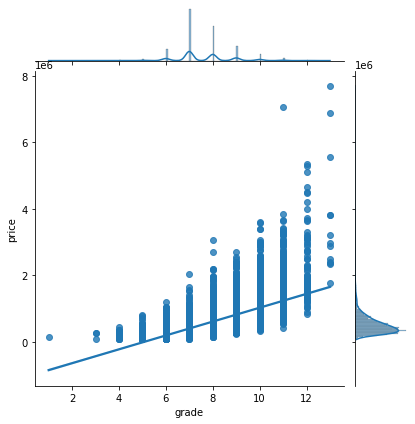

In [16]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

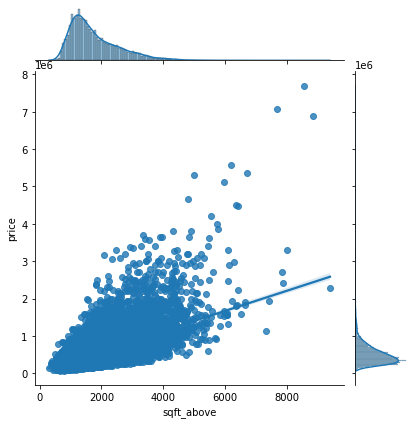

In [38]:
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg');

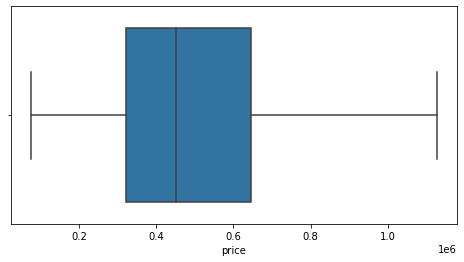

In [18]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['price'], showfliers=False)

plt.xlabel('price')
plt.show()

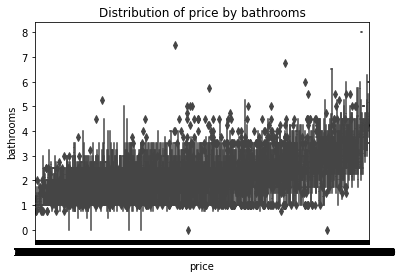

In [39]:
sns.boxplot(x=df['price'], y=df['bathrooms'], whis=1.5)

plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title('Distribution of price by bathrooms');

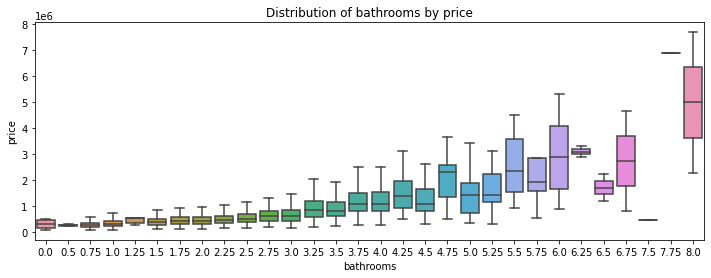

In [42]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers=False)
plt.title('Distribution of bathrooms by price');

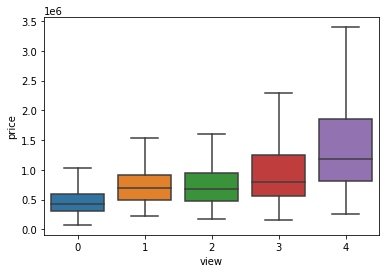

In [35]:
sns.boxplot(x=df['view'], y=df['price'], showfliers=False);

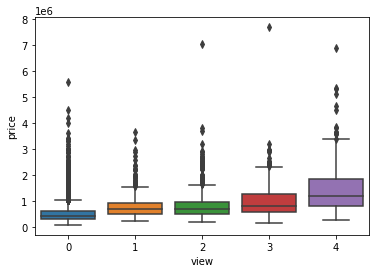

In [36]:
sns.boxplot(x=df['view'], y=df['price'], whis=1.5);